# Práctica 0: Repaso de las funcionalidades de Pandas
## Máster IoT. Tratamiento de datos Masivos

### Nombre y apellidos: Daniel Mihai   Rece



## Creación de dataframes

Crear dataframes con la información de los siguientes ficheros. 

El contenido y el formato de los ficheros no se puede modificar.


* Dataframe `caracteristicas` : `features.xlsx`
  Contiene datos extraídos del portal de Idealista referentes a propiedades en venta que se anuncian en su sitio web. A continuación, se detalla la descripción de los campos:
  
  * `code`: código de propiedad
  * `numPhotos` : número de fotos
  * `floor`: Número de plantas   
  * `size_m2`: tamaño en metros cuadrados
  * `exterior`: indica si es exterior o no
  * `rooms`: número de habitaciones
  * `bathrooms`: número de baños  
  * `hasLift`: indica si tiene ascensor o no
  * `price` : precio 
  * `status`: estado de conservación
  
* Dataframe `propiedades`:  `properties.xlsx`   Contiene información asociada a las propiedades. Los campos son:
  * `propertyCode`: código de propiedad
  * `externalReference`: referencia
  * `propertyType`: tipo de propiedad
  * `municipality`  : municipio     
  * `district`: distrito
  * `latitude`: latitud
  * `longitude`: longitud  
  * `priceByArea`: precio del metro cuadrado
  * `neighborhood`: vecindario al que pertenece la propiedad


Puedes usar la función `read_excel`.

In [6]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Sol:
import pandas as pd
mypath = '~/git/Tratamiento-de-Datos-Masivos/Practica 0/'
features = pd.read_excel(mypath + "features.xlsx")
properties = pd.read_excel(mypath + "properties.xlsx")

## Pregunta 1
Muestra la información sobre la estructura de ambas tablas. Para ello puedes usar el método `info`.
* Explora los tipos de datos de cada una de las columnas. 
* Localiza la información sobre los valores nulos de las columnas.


__(a)__ ¿Cuántos valores nulos hay en la columna `floor` de la tabla `características`.? 64 (1055 entradas - 991 valores no nulos)

__(b)__ ¿Cuántas filas tiene cada una de las tablas? 1055 entradas cada tabla

In [10]:
features.info()
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   code       1055 non-null   int64  
 1   numPhotos  1055 non-null   int64  
 2   size_m2    1055 non-null   int64  
 3   floor      991 non-null    object 
 4   exterior   1055 non-null   bool   
 5   rooms      1055 non-null   int64  
 6   bathrooms  1055 non-null   int64  
 7   hasLift    1027 non-null   float64
 8   status     1055 non-null   object 
 9   price      1055 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 75.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyCode       1055 non-null   int64  
 1   externalReference  843 non-null    object 
 2   propertyType       1055 non-null   ob

## Pregunta 2


La columna `propertyType` recoge información del tipo de propiedad ofertada en Idealista. Muestra los distintos tipos de propiedad disponibles. Puedes usar los métodos `unique` o `value_counts`. 
Describe lo que hacen estas funciones y la direrencia entre ellas.

In [12]:
# Sol:
properties['propertyType'].unique() #Devuelve un numpy array con los distintos valores de la columna
properties['propertyType'].value_counts() #Devuelve una serie de pandas con los distintos valores de la columna como índice el número de entradas asociadas a cada uno de ellos como valores

propertyType
flat         973
duplex        54
penthouse     23
studio         5
Name: count, dtype: int64

## Pregunta 3

La columna `priceByArea` recoge información acerca del precio por metro cuadrado en la zona de ubicación de la propiedad. Crea un nuevo dataframe  que contenga únicamente aquellas propiedades cuyo precio por metro cuadrado supere los 2600€. El nuevo dataframe ha de llamarse `high_level`.

Para resolver este caso, es necesario crear un filtro o máscara y luego aplicar la máscara al dataframe original. Puedes encontrar información en la sección `Más consultas` del documento `t1_intro_pandas`.

In [13]:
# Sol:
high_level = properties[properties['priceByArea']>2600]
high_level

,propertyCode,externalReference,propertyType,municipality,district,latitude,longitude,priceByArea,neighborhood,valor
5,90348142,VP1570,flat,Villaviciosa de Odón,Centro,40.362845,-3.909477,3980,NaN,H
22,92680568,1162,flat,Villaviciosa de Odón,Centro,40.358384,-3.905814,2892,NaN,H
26,93175770,P20268,flat,Villaviciosa de Odón,Centro,40.356286,-3.902701,3310,NaN,H
38,85774848,CASTILLOS,flat,Alcorcón,Valderas - Los Castillos,40.353391,-3.803433,2947,Valderas - Los Castillos,H
39,91129855,NaN,duplex,Villaviciosa de Odón,Centro,40.355985,-3.908502,3333,NaN,H
...,...,...,...,...,...,...,...,...,...,...
1037,92759195,21020901V,flat,Villaviciosa de Odón,Centro,40.355539,-3.901768,3053,NaN,H
1038,85386234,1808/131,penthouse,Alcorcón,Parque Lisboa - La Paz,40.351195,-3.820592,2797,Parque Lisboa - La Paz,H
1040,90747765,P1 1ºB,flat,Alcorcón,Parque oeste - Fuente Cisneros,40.343850,-3.845690,3149,Parque oeste - Fuente Cisneros,H
1046,87157855,P3 PRIMERA A,flat,Alcorcón,Parque oeste - Fuente Cisneros,40.343850,-3.845690,3216,Parque oeste - Fuente Cisneros,H


## Pregunta 4

La columna `status` recoge información acerca del estado de conservación de la propiedad.  La columna `size` recoge información acerca del tamaño de la propiedad. Crea un nuevo dataframe  que contenga únicamente aquellas propiedades con más de 250 metros cuadrados cuyo estado de conservación sea `good`. El nuevo dataframe ha de llamarse `good`.

Para resolver este caso, es necesario crear un filtro o máscara y luego aplicar la máscara al dataframe original. Puedes encontrar información en la sección `Más consultas` del documento `t1_intro_pandas`. Recuerda que el operador `and` y `or` no se comportan en pandas como es habitual. Estos operadores actuan sobre el dataframe completo. Pero en pandas necesitamos un operador que actúe elemento a elemento. Estos operadores son `$` para la conjunción y  `|` para la disyunción. 

In [14]:
# Sol:
good = features[(features['status'] == 'good') & (features['size_m2'] >250)]
good

,code,numPhotos,size_m2,floor,exterior,rooms,bathrooms,hasLift,status,price
581,37065084,37,266,6,False,4,4,1.0,good,336000
600,93215669,47,260,3,True,5,3,0.0,good,330000


## Pregunta 5

Crear un nuevo dataframe llamado `ordenadas` donde las propiedades se encuentren ordenadas siguiendo el siguiente criterio:  Ordenar las propiedades por precio(creciente), tamaño de la propiedad(creciente) y número de habitaciones(decreciente). 
Usa el método `sort_values`.

In [15]:
# Sol:
ordenadas = features.sort_values(by=['price','size_m2','rooms'], ascending = [True, True, False])
ordenadas

,code,numPhotos,size_m2,floor,exterior,rooms,bathrooms,hasLift,status,price
162,92836724,16,68,bj,True,2,1,0.0,renew,69000
883,93174672,11,57,4,False,3,1,0.0,good,77300
338,89712404,8,29,bj,True,1,1,1.0,good,81000
867,81723775,16,65,bj,True,2,1,0.0,good,83000
574,93089279,35,65,4,True,3,1,0.0,renew,86000
...,...,...,...,...,...,...,...,...,...,...
397,90395385,16,138,4,True,3,3,1.0,newdevelopment,505500
661,93000509,39,162,5,True,4,3,1.0,good,510000
396,90747765,16,164,1,True,4,3,1.0,newdevelopment,516500
400,90747765,16,164,1,True,4,3,1.0,newdevelopment,516500


## Pregunta 6

Modifica el dataframe `propiedades`. La columna `priceByArea` indica el precio por metro cuadrado en la zona. Crea una nueva columna llamada `category` cuyo valor sea `H` si el precio por metro cuadrado es superior a 1500€ y  `L` en caso contrario. 

Este caso no tiene una única solución. Puedes usar la función `map`.
En algunos casos, es necesario transformar columnas o crear columnas nuevas mediante la aplicación de operaciones complejas u operaciones basadas en múltiples columnas. Python en un lenguaje funcional e implementa algunas de las características de los lenguajes funcionales, como es la aplicación de funciones. Las funciones `map`, `apply`, y `applymap` son funciones que se utilizan para aplicar transformaciones más sofisticadas a los datos.
Puedes encontrar algunos ejemplos en `t3_pandas_map`.

In [16]:
# Sol:
def hl(valor):
    if valor > 1500:
        result = 'H'
    else:
        result = 'L'
    return result

properties['category'] = properties['priceByArea'].map(hl)
properties[['priceByArea', 'category']]

,priceByArea,category
0,1998,H
1,2103,H
2,1819,H
3,2269,H
4,2317,H
...,...,...
1050,3444,H
1051,1591,H
1052,1709,H
1053,1528,H


## Pregunta 7

Calcular el precio máximo del metro cuadrado de las propiedades por municipio y distrito.
Aquí tenemos que realizar una operación de agrupación de tipo `group_by`.

Podéis encontrar algunos ejemplos en https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [17]:
# Sol:
properties[['municipality', 'district','priceByArea']].groupby(['municipality', 'district']).max('priceByArea')

priceByArea
municipality         district                                   
Alcorcón             Bellasvistas - Hipercor                2461
                     Campodón - Ventorro del Cano           1556
                     Centro                                 3346
                     Parque Lisboa - La Paz                 2933
                     Parque Ondarreta - Urtinsa             2831
                     Parque oeste - Fuente Cisneros         3726
                     Prado de Santo Domingo                 3070
                     Valderas - Los Castillos               3518
Fuenlabrada          El Naranjo                             2273
                     Fuenlabrada II - El Molino             1729
                     La Serna                               2611
                     Loranca                                3800
                     Universidad - Hospital                 3215
Móstoles             Centro                                 3495
                     Coimbra - Guadarrama                   2456
                     El Soto - Coveta                       2710
                     Este                                   2853
                     Norte - Universidad                    3231
                     Sur                                    3307
                     Suroeste                               2875
Villaviciosa de Odón Castillo - Campodón                    3773
                     Centro                                 5286

## Pregunta 8

Calcular el precio medio de las propiedades por status y número de habitaciones.
Aquí tenemos que realizar una operación de agrupación de tipo `group_by`.

Podéis encontrar algunos ejemplos en https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [18]:
# Sol:
features[['status','rooms','price']].groupby(['status', 'rooms']).mean('price')

price
status         rooms               
good           0      144750.000000
               1      155490.400000
               2      186614.044118
               3      181806.914339
               4      245981.268657
               5      351165.833333
               6      369375.000000
newdevelopment 1      224500.000000
               2      292598.166667
               3      339472.432432
               4      419011.666667
renew          0      176666.000000
               1      106050.000000
               2      121720.000000
               3      138604.116883
               4      210968.750000
               5      330000.000000

## Pregunta 9

La columna `neighborhood` recoge información adicional acerca de las características del entorno de la propiedad. 
* Averigua cuántos valores NaN existen en dicha columna. 
* Sustituye los valores NaN de dicha columna por el valor "No comments"

Existen varios métodos que me permiten estudiar y tratar los nulos: `isna`, `isnull`, `notna`, `notnull`. 
La operación `fillna` te ayudará a resolver este ajercicio.


Usa estas funciones y describe lo que hace cada una de ellas.

In [19]:
# Sol:
len(properties[properties['neighborhood'].isna()]) #673 valores nulos en la columna
properties['neighborhood'] = properties['neighborhood'].fillna("No comments")

## Pregunta 10

Calcula el salario medio de las propiedades con ascensor situadas en el municipio de Móstoles.
En este caso, la consulta se refiere a varios dataframes.
Para resolverlo, podemos realizar un join de las tablas (como en SQL) usando la operación `merge`.
La ejeccución de la siguiente celda te dará ayuda y algunos ejemplos (al final).
Fíjate en los argumentos ` left_on` y  `right_on`.


In [20]:
inner_merged_df = pd.merge(left = properties, right = features, how = 'inner', left_on = properties['propertyCode'], right_on = features['code']).drop_duplicates()

In [21]:
# Sol:
inner_merged_df[(inner_merged_df['hasLift'])&(inner_merged_df['municipality'] == 'Móstoles')]['price'].mean()

194389.96648044692

## Pregunta 11

Calcula el número de propiedades situadas en Fuenlabrada que cuentan con ascensor (campo `hasLift`).

Una vez resuelto la pregunta 10, no deberías tener problemas aquí.

In [22]:
# Sol:
len(inner_merged_df[(inner_merged_df['hasLift'])&(inner_merged_df['municipality'] == 'Fuenlabrada')])

95

## Pregunta 12

Un valor atípico es una observación que se aleja demasiado de la media; esta muy lejos de la tendencia principal del resto de los datos. Pueden ser causados por errores en la recolección de datos o medidas inusuales. Generalmente se recomienda eliminarlos del conjunto de datos.

Para detectarlos hay varias técnicas. Una técnica no paramétrica es mediante el cálculo del rango intercuartílico (IQR). IQR es el rango entre el primer y el tercer cuartil: IQR=Q3−Q1

Los puntos de datos que caen por debajo de Q1−1.5×IQR o por encima de Q3+1.5×IQR son valores atípicos.

Se pide: calcular los valores atípicos de las columna `price` de la tabla `características`.
Con el método `quantile` podrás calcular los cuartiles Q1 y Q3.


In [25]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 10.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: >

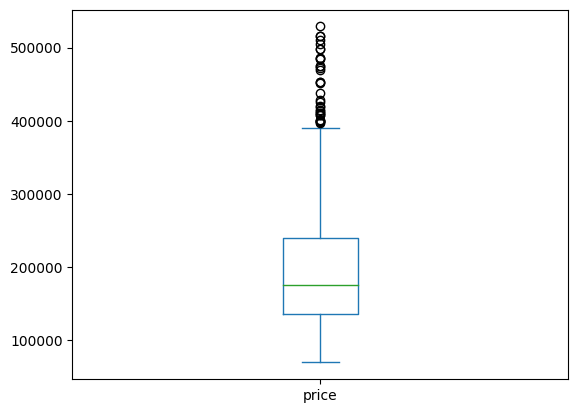

In [26]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
features.price.plot(kind = 'box')

In [27]:
Q1 = features['price'].quantile(0.25)
Q3 = features['price'].quantile(0.75)
IQR = Q3-Q1

In [28]:
features[(features['price'] < Q1-IQR*1.5) | (features['price'] > Q3+IQR*1.5)]['price']

99     453000
109    397500
110    486500
127    451700
129    471600
149    415000
151    410000
221    453000
223    419000
225    425000
262    400000
266    470000
293    485000
374    410000
379    399000
381    413250
382    438400
394    485600
395    428500
396    516500
397    505500
399    497500
400    516500
401    498500
504    528990
532    398000
551    407600
607    400000
661    510000
839    420000
843    475000
850    475000
942    401400
967    407600
Name: price, dtype: int64